本篇文章使用Linear Regression模型对Google股票的Adj. Close指标进行模拟预测。并对预测结果进行可视化展示。Google股票数据来自quandl库，需要单独安装。以下是完整的处理和预测过程及python源码。


In [1]:
#导入库文件
import datetime
import numpy as np
import pandas as pd
import quandl, math
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

#设置图表风格
style.use('ggplot')
#下载google历史数据
df = quandl.get("WIKI/GOOGL")
df.head()

D:\python\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


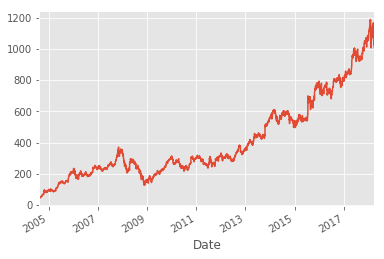

In [2]:
#查看Google的Adj. Close变化趋势
df['Adj. Close'].plot()
plt.show()

# 划分训练集，测试集和预测数据
我们将2005年到2017年的Google股票数据划分为三部分，首先，取其中的1%模拟新进数据，使用模型对这1%的数据进行预测，获得Adj. Close的预测值。剩下的99%历史数据我们按常规方法划分为训练集和测试集，训练集用于对线性模型进行拟合训练，测试集数据则用来评估模型表现。

第一步划分用于测试的数据，计算Google股票历史数据1%的数值，然后从后向前提取出这1%的数据，保留用于后面的预测


In [3]:
#提取历史数据的后1%用来进行预测
#计算历史数据1%的数值
forecast = int(math.ceil(0.01 * len(df)))
forecast

35

In [4]:
#提取历史数据的后1%作为预测数据。
forecast_df = df[-forecast:]
forecast_df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-02-06,1033.98,1087.38,1030.01,1084.43,3732527.0,0.0,1.0,1033.98,1087.38,1030.01,1084.43,3732527.0
2018-02-07,1084.97,1086.53,1054.62,1055.41,2544683.0,0.0,1.0,1084.97,1086.53,1054.62,1055.41,2544683.0
2018-02-08,1059.87,1063.93,1005.12,1005.60,3067173.0,0.0,1.0,1059.87,1063.93,1005.12,1005.60,3067173.0
2018-02-09,1025.88,1051.72,997.00,1043.43,4436032.0,0.0,1.0,1025.88,1051.72,997.00,1043.43,4436032.0
2018-02-12,1056.67,1065.57,1045.49,1054.56,2796258.0,0.0,1.0,1056.67,1065.57,1045.49,1054.56,2796258.0
2018-02-13,1050.00,1061.22,1046.92,1054.14,1574121.0,0.0,1.0,1050.00,1061.22,1046.92,1054.14,1574121.0
2018-02-14,1054.32,1075.47,1049.80,1072.70,2029979.0,0.0,1.0,1054.32,1075.47,1049.80,1072.70,2029979.0
2018-02-15,1083.45,1094.10,1067.23,1091.36,1806206.0,0.0,1.0,1083.45,1094.10,1067.23,1091.36,1806206.0
2018-02-16,1093.38,1108.31,1091.55,1095.50,1971928.0,0.0,1.0,1093.38,1108.31,1091.55,1095.50,1971928.0


In [5]:
#预测数据表维度
forecast_df.shape

(35, 12)

从前向后提取Google股票历史数据中剩余的99%，将这部分数据划分为训练集和测试集。


In [7]:
#提取历史数据的剩余部分用来训练和测试模型表现
google_df = df[:-forecast]
google_df 

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.010,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.010,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.760,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.240,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.760,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0
2004-08-26,104.950,107.95,104.66,107.910,7094800.0,0.0,1.0,52.637487,54.142132,52.492038,54.122070,7094800.0
2004-08-27,108.100,108.62,105.69,106.150,6211700.0,0.0,1.0,54.217364,54.478169,53.008633,53.239345,6211700.0
2004-08-30,105.280,105.49,102.01,102.010,5196700.0,0.0,1.0,52.802998,52.908323,51.162935,51.162935,5196700.0
2004-08-31,102.320,103.71,102.16,102.370,4917800.0,0.0,1.0,51.318415,52.015567,51.238167,51.343492,4917800.0


In [8]:
#把label以外的字段作为特征X
X = np.array(google_df.drop(['Adj. Close'], 1))
X.shape

(3389, 11)

将Google股票历史数据中除Adj. Close以外的字段设置为特征X。


将Adj. Close字段设置为预测目标值y


In [9]:
#设置Adj. Clos字段为目标值y
y = np.array(google_df['Adj. Close'])
y.shape

(3389,)

In [10]:
#划分训练集和测试集，测试集占比20%，训练集占比80%
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

# 训练模型并进行预测

In [11]:
#使用训练集数据对模型进行训练
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
#使用测试集数据层查看模型准确率得分
confidence = clf.score(X_test, y_test)
confidence

0.9999907986001616

In [12]:
#对1%的预留数据进行预测
f_X=np.array(forecast_df.drop(['Adj. Close'], 1))
forecast_set = clf.predict(f_X)
forecast

35

# 预测结果可视化

最后，我们将预测值拼接到历史数据中，并对Adj. Close数据的历史数据和预测数据进行可视化。首先在历史数据表中单独创建一个名为Forecast的字段，用于存放预测结果。


In [13]:
#创建一个Forecast列存放预测值
google_df = google_df['2018']
google_df['Forecast'] = np.nan
google_df

D:\python\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Forecast
Date,,,,,,,,,,,,,
2018-01-02,1053.02,1075.98,1053.02,1073.21,1555809.0,0.0,1.0,1053.02,1075.98,1053.02,1073.21,1555809.0,NaN
2018-01-03,1073.93,1096.10,1073.43,1091.52,1550593.0,0.0,1.0,1073.93,1096.10,1073.43,1091.52,1550593.0,NaN
2018-01-04,1097.09,1104.08,1094.26,1095.76,1289293.0,0.0,1.0,1097.09,1104.08,1094.26,1095.76,1289293.0,NaN
2018-01-05,1103.45,1113.58,1101.80,1110.29,1493389.0,0.0,1.0,1103.45,1113.58,1101.80,1110.29,1493389.0,NaN
2018-01-08,1111.00,1119.16,1110.00,1114.21,1148958.0,0.0,1.0,1111.00,1119.16,1110.00,1114.21,1148958.0,NaN
2018-01-09,1118.44,1118.44,1108.20,1112.79,1335995.0,0.0,1.0,1118.44,1118.44,1108.20,1112.79,1335995.0,NaN
2018-01-10,1107.00,1112.78,1103.98,1110.14,1027781.0,0.0,1.0,1107.00,1112.78,1103.98,1110.14,1027781.0,NaN
2018-01-11,1112.31,1114.85,1106.48,1111.88,1102461.0,0.0,1.0,1112.31,1114.85,1106.48,1111.88,1102461.0,NaN
2018-01-12,1110.10,1131.30,1108.01,1130.65,1914460.0,0.0,1.0,1110.10,1131.30,1108.01,1130.65,1914460.0,NaN


In [14]:
#查看数据表中最后一条数据的日期
last_date = google_df.iloc[-1].name
last_date

Timestamp('2018-02-05 00:00:00')

将最后一天的日期信息转化为秒的格式，便于后面的计算。


In [15]:
#将最后一条数据的日期转化为秒
last_unix = last_date.timestamp()
last_unix

1517760000.0

In [16]:
#一天等于86400秒
one_day = 86400
#下一天=数据表最后一天日期数值+一天的秒数值
next_unix = last_unix + one_day
next_unix

1517846400.0

循环将每一天的日期信息和Adj. Close字段的预测值写入到Google股票历史数据表中。首先按当前数据表中的最后一天的数值增加86400秒来获得新的一天的日期信息，然后将Adj. Close的预测数值写入到Forecast字段中。


In [17]:
#循环输出日期及预测值
for i in forecast_set:
    #下一天的数据秒数
    next_date = datetime.datetime.fromtimestamp(next_unix)
    #下一天的数据秒数+一天的秒数86400，以更新时间
    next_unix += 86400
    #在下一天的行输入NaN值和预测值
    google_df.loc[next_date] = [np.nan for _ in range(len(google_df.columns)-1)]+[i]
#查看预测后的数据表
google_df

D:\python\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Forecast
Date,,,,,,,,,,,,,
2018-01-02,1053.02,1075.98,1053.02,1073.21,1555809.0,0.0,1.0,1053.02,1075.98,1053.02,1073.21,1555809.0,NaN
2018-01-03,1073.93,1096.10,1073.43,1091.52,1550593.0,0.0,1.0,1073.93,1096.10,1073.43,1091.52,1550593.0,NaN
2018-01-04,1097.09,1104.08,1094.26,1095.76,1289293.0,0.0,1.0,1097.09,1104.08,1094.26,1095.76,1289293.0,NaN
2018-01-05,1103.45,1113.58,1101.80,1110.29,1493389.0,0.0,1.0,1103.45,1113.58,1101.80,1110.29,1493389.0,NaN
2018-01-08,1111.00,1119.16,1110.00,1114.21,1148958.0,0.0,1.0,1111.00,1119.16,1110.00,1114.21,1148958.0,NaN
2018-01-09,1118.44,1118.44,1108.20,1112.79,1335995.0,0.0,1.0,1118.44,1118.44,1108.20,1112.79,1335995.0,NaN
2018-01-10,1107.00,1112.78,1103.98,1110.14,1027781.0,0.0,1.0,1107.00,1112.78,1103.98,1110.14,1027781.0,NaN
2018-01-11,1112.31,1114.85,1106.48,1111.88,1102461.0,0.0,1.0,1112.31,1114.85,1106.48,1111.88,1102461.0,NaN
2018-01-12,1110.10,1131.30,1108.01,1130.65,1914460.0,0.0,1.0,1110.10,1131.30,1108.01,1130.65,1914460.0,NaN


In [18]:
#查看预测后的数据表
google_df.tail(50)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Forecast
Date,,,,,,,,,,,,,
2018-01-16,1140.31,1148.88,1126.66,1130.70,1783881.0,0.0,1.0,1140.31,1148.88,1126.66,1130.70,1783881.0,NaN
2018-01-17,1136.36,1139.32,1123.49,1139.10,1353097.0,0.0,1.0,1136.36,1139.32,1123.49,1139.10,1353097.0,NaN
2018-01-18,1139.35,1140.59,1124.46,1135.97,1333633.0,0.0,1.0,1139.35,1140.59,1124.46,1135.97,1333633.0,NaN
2018-01-19,1138.03,1143.78,1132.50,1143.50,1418376.0,0.0,1.0,1138.03,1143.78,1132.50,1143.50,1418376.0,NaN
2018-01-22,1143.82,1166.88,1141.82,1164.16,1437954.0,0.0,1.0,1143.82,1166.88,1141.82,1164.16,1437954.0,NaN
2018-01-23,1170.62,1178.51,1167.25,1176.17,1832126.0,0.0,1.0,1170.62,1178.51,1167.25,1176.17,1832126.0,NaN
2018-01-24,1184.98,1187.05,1167.40,1171.29,1818182.0,0.0,1.0,1184.98,1187.05,1167.40,1171.29,1818182.0,NaN
2018-01-25,1180.71,1185.00,1171.84,1182.14,1398961.0,0.0,1.0,1180.71,1185.00,1171.84,1182.14,1398961.0,NaN
2018-01-26,1187.53,1187.56,1168.03,1187.56,1981476.0,0.0,1.0,1187.53,1187.56,1168.03,1187.56,1981476.0,NaN


使用图表对Adj. Close的历史数据和预测数据进行拼接及可视化，下面图表中，红色部分为99%的历史数据中Adj. Close的变化趋势。蓝色部分为1%的Adj. Close预测数据变化趋势。


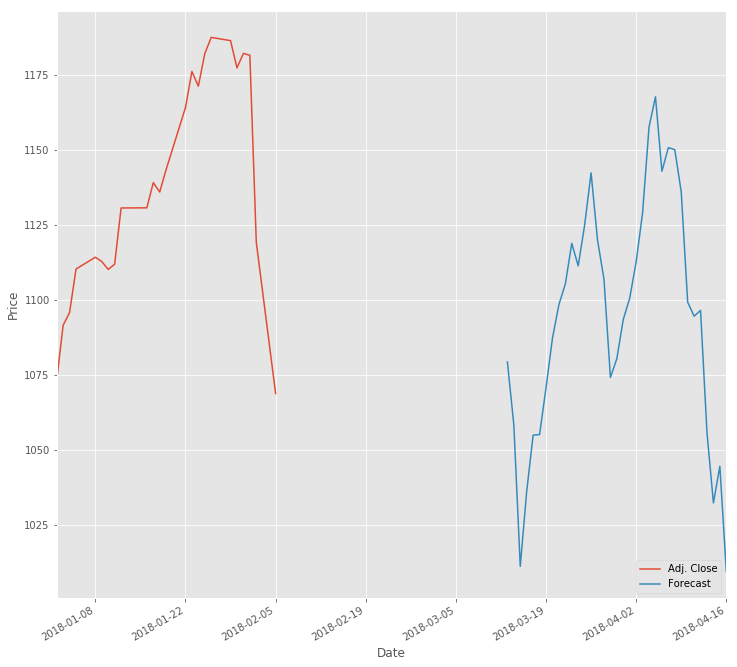

In [29]:
#对真实值和预测值可视化
fig = plt.figure(figsize = (12,12))
google_df['Adj. Close'].plot()
google_df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()